# Prediction of Movie Success

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('movie_metadata.csv')

## Understanding the data

In [3]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
data.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [7]:
data.shape

(5043, 28)

## Exploratory Data Analysis

In [8]:
# checking to see the unique values in color
data.color.unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [9]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [10]:
data.notnull().sum()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
dtype: int64

In [11]:
data.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [12]:
data.drop_duplicates(inplace=True)
data.shape

(4998, 28)

## Relationships and insights

In [13]:
# reviewing distribution of imdb scores

below_five = data.imdb_score < 5
five_to_eight = data[(data.imdb_score >=5) & (data.imdb_score <8)]
above_eight = data.imdb_score >=8

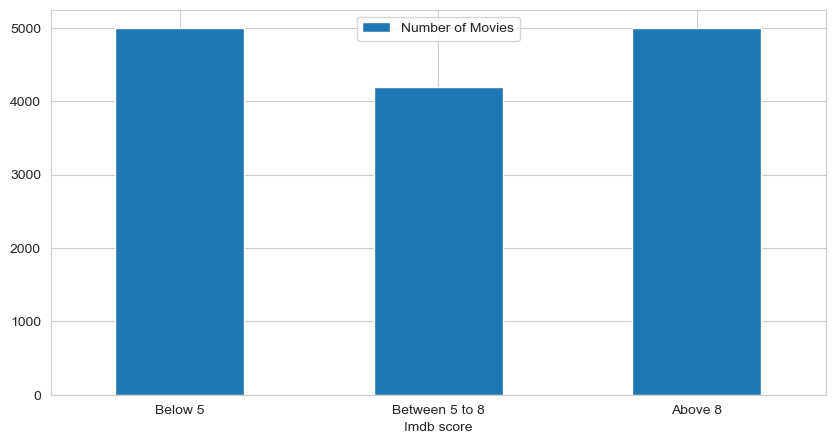

In [14]:
df = pd.DataFrame({'Imdb score':['Below 5', 'Between 5 to 8', 'Above 8'], 
                   'Number of Movies':[len(below_five), len(five_to_eight), len(above_eight)]})
ax = df.plot.bar(x='Imdb score', y='Number of Movies', rot=0, figsize = (10,5))

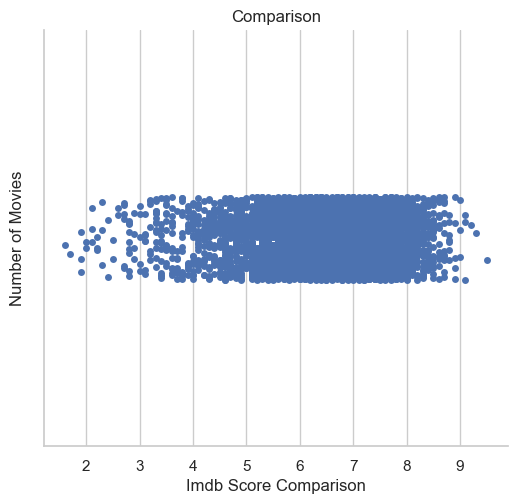

In [15]:
sns.set_theme(style="whitegrid")
sns.catplot(x= "imdb_score", data = data)
plt.xlabel("Imdb Score Comparison")
plt.ylabel("Number of Movies")
plt.title("Comparison")
plt.show()

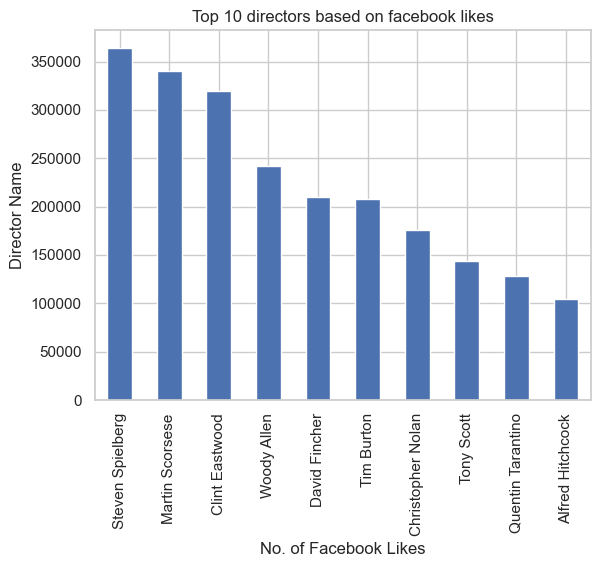

In [16]:
data.groupby('director_name').director_facebook_likes.sum().sort_values(ascending=False)[:10].plot.bar()
plt.title('Top 10 directors based on facebook likes')
plt.ylabel('Director Name')
plt.xlabel('No. of Facebook Likes')

plt.show()

array([[<Axes: title={'center': 'num_critic_for_reviews'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'director_facebook_likes'}>,
        <Axes: title={'center': 'actor_3_facebook_likes'}>],
       [<Axes: title={'center': 'actor_1_facebook_likes'}>,
        <Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'num_voted_users'}>,
        <Axes: title={'center': 'cast_total_facebook_likes'}>],
       [<Axes: title={'center': 'facenumber_in_poster'}>,
        <Axes: title={'center': 'num_user_for_reviews'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'title_year'}>],
       [<Axes: title={'center': 'actor_2_facebook_likes'}>,
        <Axes: title={'center': 'imdb_score'}>,
        <Axes: title={'center': 'aspect_ratio'}>,
        <Axes: title={'center': 'movie_facebook_likes'}>]], dtype=object)

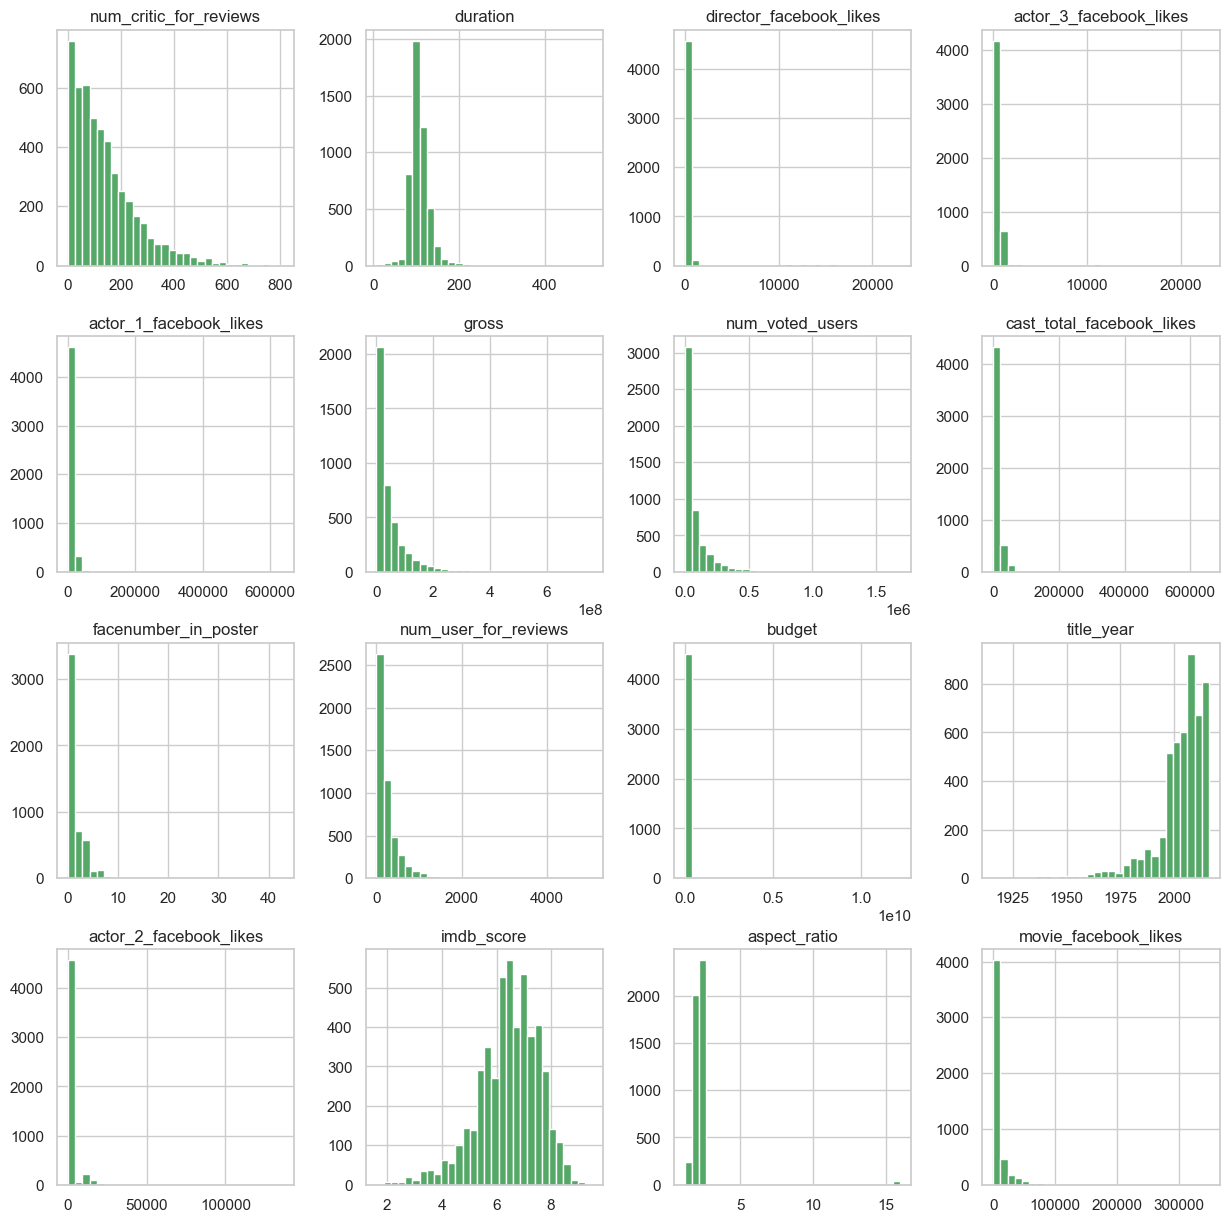

In [17]:
data.hist(bins=30, figsize=(15,15),color='g')

In [18]:
# creating a new column to show the first genre type

data['genre_class'] = data.genres.apply(lambda x: x.split('|')[0] if '|' in x else x)

In [19]:
# checking columns
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'genre_class'],
      dtype='object')

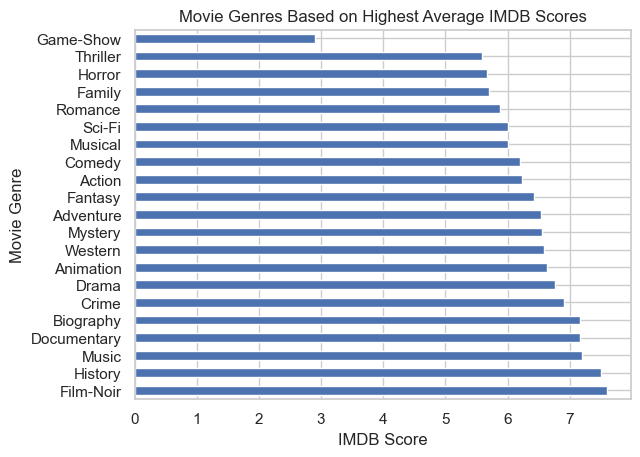

In [20]:
data.groupby('genre_class').imdb_score.mean().sort_values(ascending=False).plot.barh()
plt.title('Movie Genres Based on Highest Average IMDB Scores')
plt.ylabel('Movie Genre')
plt.xlabel('IMDB Score')

plt.show()

<Axes: xlabel='imdb_score', ylabel='genre_class'>

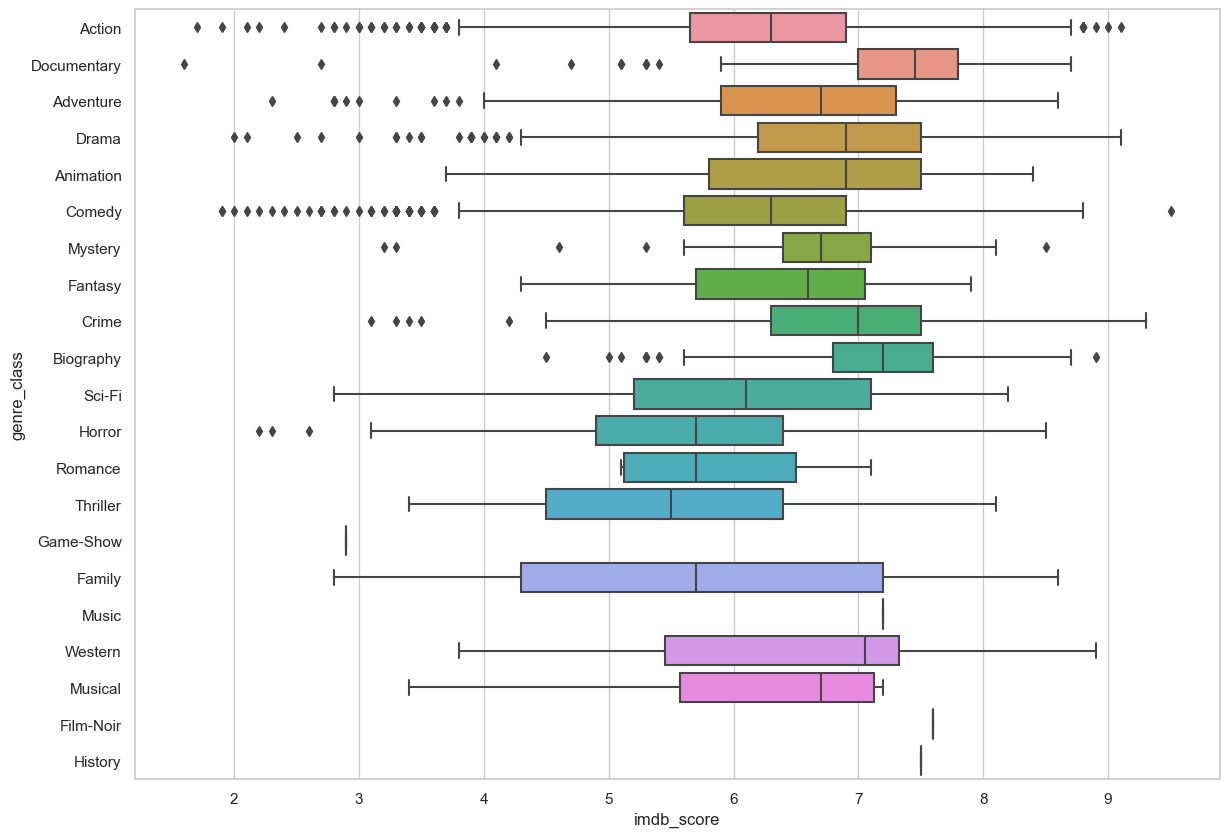

In [21]:
plt.figure(figsize=(14,10))
sns.boxplot(x='imdb_score',y='genre_class',data=data)

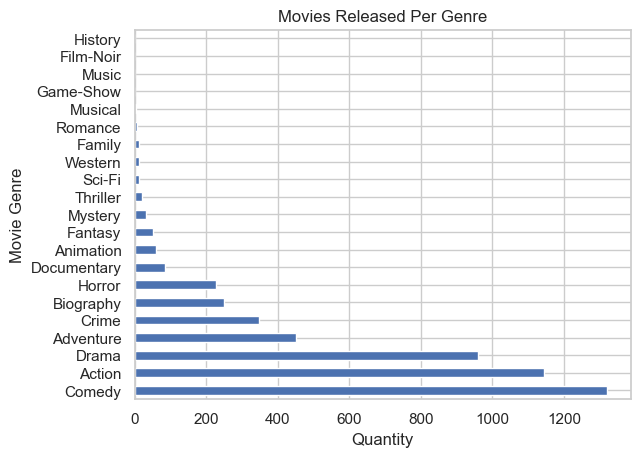

In [22]:
# number of movies released per genre
data.genre_class.value_counts().sort_values(ascending=False).plot.barh()
plt.title('Movies Released Per Genre')
plt.ylabel('Movie Genre')
plt.xlabel('Quantity')

plt.show()

In [23]:
data.drop('genres', axis=1, inplace=True)


In [24]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'genre_class'],
      dtype='object')

## Cleaning and Data Manipulation

In [25]:
# categorizing imdb scores into classes:

bins = [ 1, 5, 8, 10]
labels = ['Poor', 'Fair', 'Box_Office!']
data['imdb_binned'] = pd.cut(data['imdb_score'], bins=bins, labels=labels)

In [26]:
# removing unnecessary columns:
data.drop(columns=['movie_title', 'movie_imdb_link','imdb_score','aspect_ratio'], inplace=True)

In [27]:
numerical_cols = [col for col in data.columns if data[col].dtype != 'object']
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

In [28]:
print(numerical_cols[:])

['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'movie_facebook_likes', 'imdb_binned']


In [29]:
print(categorical_cols[:])

['color', 'director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name', 'plot_keywords', 'language', 'country', 'content_rating', 'genre_class']


In [30]:
# Dropping the null values:

data.dropna(inplace=True)


In [31]:
data.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
actor_1_name                 0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
movie_facebook_likes         0
genre_class                  0
imdb_binned                  0
dtype: int64

In [32]:
data.shape

(3770, 25)

## Encoding

In [33]:
categories_dummies = pd.get_dummies(data[categorical_cols])
categories_dummies.head()

,color_ Black and White,color_Color,director_name_Aaron Schneider,director_name_Aaron Seltzer,director_name_Abel Ferrara,director_name_Adam Goldberg,director_name_Adam Marcus,director_name_Adam McKay,director_name_Adam Rapp,director_name_Adam Rifkin,...,genre_class_Drama,genre_class_Family,genre_class_Fantasy,genre_class_Horror,genre_class_Musical,genre_class_Mystery,genre_class_Romance,genre_class_Sci-Fi,genre_class_Thriller,genre_class_Western
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data = pd.concat([data,categories_dummies], axis=1)

print(data.shape)
data.head()

(3770, 11824)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,genre_class_Drama,genre_class_Family,genre_class_Fantasy,genre_class_Horror,genre_class_Musical,genre_class_Mystery,genre_class_Romance,genre_class_Sci-Fi,genre_class_Thriller,genre_class_Western
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,0,0,0,0,0,0,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,...,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,...,0,0,0,0,0,0,0,0,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,...,0,0,0,0,0,0,0,0,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# deleting initial categorical columns

data = data.drop(categorical_cols,axis=1)

data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,genre_class_Drama,genre_class_Family,genre_class_Fantasy,genre_class_Horror,genre_class_Musical,genre_class_Mystery,genre_class_Romance,genre_class_Sci-Fi,genre_class_Thriller,genre_class_Western
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,0,0,0,0,0,0,0,0,0,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,0,0,0,0,0,0,0,0,0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,0,0,0,0,0,0,0,0,0,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,0,0,0,0,0,0,0,0,0,0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data.shape

(3770, 11814)

## Target Selection

In [37]:
y = data.imdb_binned
y.head()

0           Fair
1           Fair
2           Fair
3    Box_Office!
5           Fair
Name: imdb_binned, dtype: category
Categories (3, object): ['Poor' < 'Fair' < 'Box_Office!']

In [38]:
X = data.drop('imdb_binned', axis=1)
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,genre_class_Drama,genre_class_Family,genre_class_Fantasy,genre_class_Horror,genre_class_Musical,genre_class_Mystery,genre_class_Romance,genre_class_Sci-Fi,genre_class_Thriller,genre_class_Western
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,0,0,0,0,0,0,0,0,0,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,0,0,0,0,0,0,0,0,0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,0,0,0,0,0,0,0,0,0,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,0,0,0,0,0,0,0,0,0,0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,...,0,0,0,0,0,0,0,0,0,0


## Model Preparation

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [41]:
# Initialization of models

LR = LogisticRegression(random_state=1)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=1)
RF = RandomForestClassifier(random_state=1)

In [42]:
models = [LR, KN, DC, RF]

In [43]:
# Scaling of Independent Variables

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(prediction,y_test))

In [45]:
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)


For LogisticRegression, Accuracy score is 0.8682581786030061 

              precision    recall  f1-score   support

 Box_Office!       0.07      1.00      0.14         3
        Fair       1.00      0.87      0.93      1126
        Poor       0.00      0.00      0.00         2

    accuracy                           0.87      1131
   macro avg       0.36      0.62      0.36      1131
weighted avg       0.99      0.87      0.93      1131


For KNeighborsClassifier, Accuracy score is 0.8673740053050398 

              precision    recall  f1-score   support

 Box_Office!       0.00      0.00      0.00         0
        Fair       1.00      0.87      0.93      1131
        Poor       0.00      0.00      0.00         0

    accuracy                           0.87      1131
   macro avg       0.33      0.29      0.31      1131
weighted avg       1.00      0.87      0.93      1131


For DecisionTreeClassifier, Accuracy score is 0.8682581786030061 

              precision    recall  f1-sc

## Inspecting Feature Importances

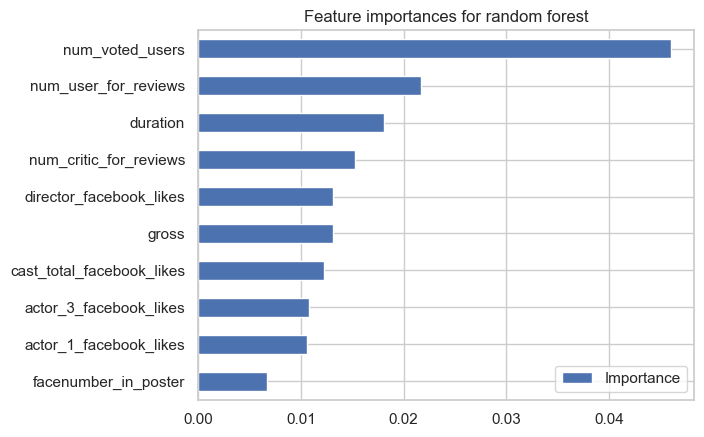

In [46]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_test.columns, columns=['Importance'])

# the top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()